# Ejercicio Covid-19

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Actualizar submodule: git submodule update

In [2]:
# Datos https://github.com/CSSEGISandData/COVID-19.git
data = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv" )
data.sample(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
181,Shanxi,China,37.5777,112.2922,1,1,1,6,9,13,...,133,133,133,133,133,133,133,133,133,133.0
271,"Riverside County, CA",US,33.9533,-117.3961,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
366,"Montgomery, TX",US,30.3883,-95.6963,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [3]:
# Número de Países diferentes
print(data['Country/Region'].nunique())

183


In [4]:
#Saco un dataset con solo los países
data_countries = data.groupby("Country/Region", as_index=False).sum()
#Se ve que están todos y comprobado que suma
data_countries[::]

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,11,16,21,22,22,22,24,24,40,40.0
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,38,42,51,55,59,64,70,76,89,89.0
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,37,48,54,60,74,87,90,139,201,201.0
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,1,1,2,39,39,53,75,88,113,113.0
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Uzbekistan,41.3775,64.5853,0,0,0,0,0,0,0,...,0,1,6,10,15,23,33,43,43,43.0
179,Venezuela,6.4238,-66.5897,0,0,0,0,0,0,0,...,2,10,17,33,36,42,42,70,70,70.0
180,Vietnam,16.0000,108.0000,0,2,2,2,2,2,2,...,53,56,61,66,75,85,91,94,113,113.0
181,Zambia,-15.4167,28.2833,0,0,0,0,0,0,0,...,0,0,0,0,2,2,2,2,3,3.0


In [5]:
# Hago transposición de los datos para mover las columnas en filas 
data_trans = data_countries.set_index('Country/Region').transpose()
# Y me quedo sólo con los datos temporales y número de casos
data_time = data_trans[2:]
data_time.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [6]:
# Cogemos solo determinados países
data_time = data_time[['China', 'France', 'Germany', 'Iran','Italy', 'Korea, South', 'Norway','Spain', 'US', 'United Kingdom']]

# Para coger los países que en día 20 tienen más de 1000 casos: data_countries = data_countries[data_countries["3/17/20"] >= 1000 ]
data_time.head(2)

Country/Region,China,France,Germany,Iran,Italy,"Korea, South",Norway,Spain,US,United Kingdom
1/22/20,548.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1/23/20,643.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [7]:
#Convierto la columna fecha en datetime
from datetime import date
data_time.index = pd.to_datetime(data_time.index)
data_time.head()

Country/Region,China,France,Germany,Iran,Italy,"Korea, South",Norway,Spain,US,United Kingdom
2020-01-22,548.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2020-01-23,643.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2020-01-24,920.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0
2020-01-25,1406.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0
2020-01-26,2075.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0


In [8]:
# Coger solo datos del último mes
data_time_filter = data_time[-30:]
# Si quiero quitar China: data_time_filter = data_time_filter.drop('China', axis=1)
data_time_filter.head(2)

Country/Region,China,France,Germany,Iran,Italy,"Korea, South",Norway,Spain,US,United Kingdom
2020-02-23,77022.0,12.0,16.0,43.0,155.0,602.0,0.0,2.0,15.0,9.0
2020-02-24,77241.0,12.0,16.0,61.0,229.0,833.0,0.0,2.0,51.0,13.0


In [9]:
#Hago listado de Countries
list_countries = data_time_filter.columns
list_countries

Index(['China', 'France', 'Germany', 'Iran', 'Italy', 'Korea, South', 'Norway',
       'Spain', 'US', 'United Kingdom'],
      dtype='object', name='Country/Region')

In [10]:
'''Vamos a hacer un gráfico para ver los casos confirmados (desde caso 100)'''

#Exporto los datos en diferentes arhcivos con casa país
for country in list_countries:
    dataX = data_time_filter[country]
    dataX = dataX[dataX > 100]
    dataX.to_csv('data_' + country + ".csv", index=False, header= country)

# from glob import glob
# filenames = glob('*.csv')
# dataframes = [pd.read_csv(f) for f in filenames]
# dataframes

# Quitar fechas de index, y ponerlo con número
# data_time_filter = data_time_filter.reset_index(drop=True)
# data_time_filter

In [11]:
# Creamos los CSV
dataframe_France = pd.read_csv('data_France.csv')
dataframe_China = pd.read_csv('data_China.csv')
dataframe_Germany = pd.read_csv('data_Germany.csv')
dataframe_Iran = pd.read_csv('data_Iran.csv')
dataframe_Italy = pd.read_csv('data_Italy.csv')
dataframe_Korea = pd.read_csv('data_Korea, South.csv')
dataframe_Norway = pd.read_csv('data_Norway.csv')
dataframe_Spain = pd.read_csv('data_Spain.csv')
dataframe_US = pd.read_csv('data_US.csv')
dataframe_UnitedKingdom = pd.read_csv('data_United Kingdom.csv')

In [12]:
# Rellenar los 0 por NaN y expoertar
data_drive_from100 = data_time_filter.loc[:,list_countries].copy()
data_drive_from100 = data_drive_from100.replace(0, 'null')
#Exportar CSV desde caso 100
data_drive_from100.to_csv('covid19_data_drive_from100.csv', sep = ';')
data_drive_from100.head(2)

Country/Region,China,France,Germany,Iran,Italy,"Korea, South",Norway,Spain,US,United Kingdom
2020-02-23,77022.0,12.0,16.0,43.0,155.0,602.0,null,2.0,15.0,9.0
2020-02-24,77241.0,12.0,16.0,61.0,229.0,833.0,null,2.0,51.0,13.0


## Modelado de AR

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data_time_spain, order = (2, 0, 0)).fit() 

NameError: name 'data_time_spain' is not defined

In [ ]:
prediction = model.get_forecast(steps = 12)

In [15]:
prediction.conf_int().head()

NameError: name 'prediction' is not defined

In [16]:
prediction.predicted_mean.head()

NameError: name 'prediction' is not defined

In [371]:
lower = prediction.conf_int()["lower Spain"]
upper = prediction.conf_int()["upper Spain"]

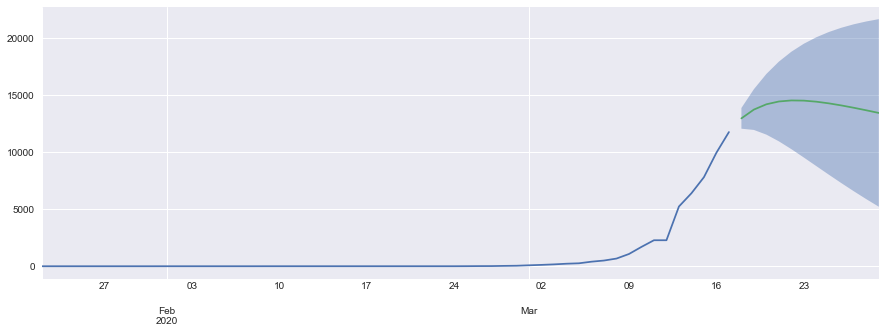

In [372]:
fig, ax = plt.subplots()
data_time_spain.plot(ax = ax)
prediction.predicted_mean.plot(ax = ax)
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

In [373]:
from statsmodels.tsa.stattools import adfuller
adfuller(data_time.Spain)

(3.410951690700507,
 1.0,
 11,
 44,
 {'1%': -3.5885733964124715,
  '5%': -2.929885661157025,
  '10%': -2.6031845661157025},
 507.2925170512722)

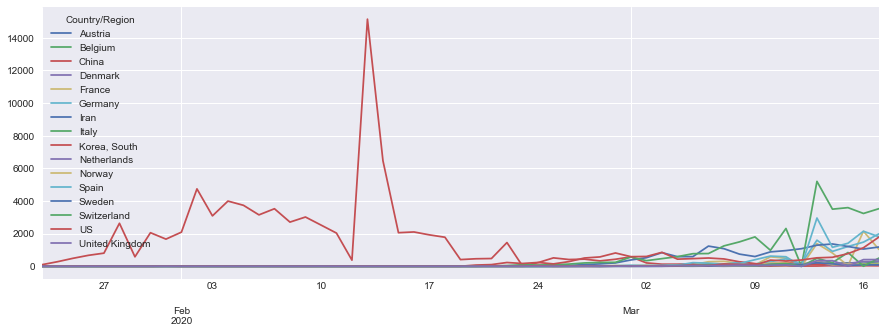

In [374]:
data_diff = data_time - data_time.shift(1)
data_diff.dropna(inplace = True)
data_diff.plot();

In [375]:
adfuller(data_diff.Spain)

(4.397045159343214,
 1.0,
 11,
 43,
 {'1%': -3.5925042342183704,
  '5%': -2.931549768951162,
  '10%': -2.60406594375338},
 500.7439543949986)

## Modelo SARIMA

In [376]:
model = SARIMAX(data_time.Spain, order = (3, 1, 2), seasonal_order = (1, 1, 2, 12)).fit()

/Users/victormac/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/victormac/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [377]:
prediction = model.get_forecast(steps = 12)
lower = prediction.conf_int()["lower Spain"]
upper = prediction.conf_int()["upper Spain"]

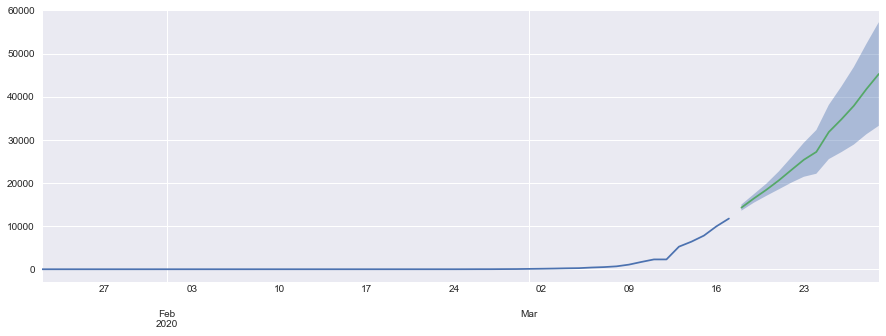

In [378]:
data_time.Spain.plot()
prediction.predicted_mean.plot()
plt.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

In [379]:
model.resid.head()

2020-01-22    0.0
2020-01-23    0.0
2020-01-24    0.0
2020-01-25    0.0
2020-01-26    0.0
dtype: float64

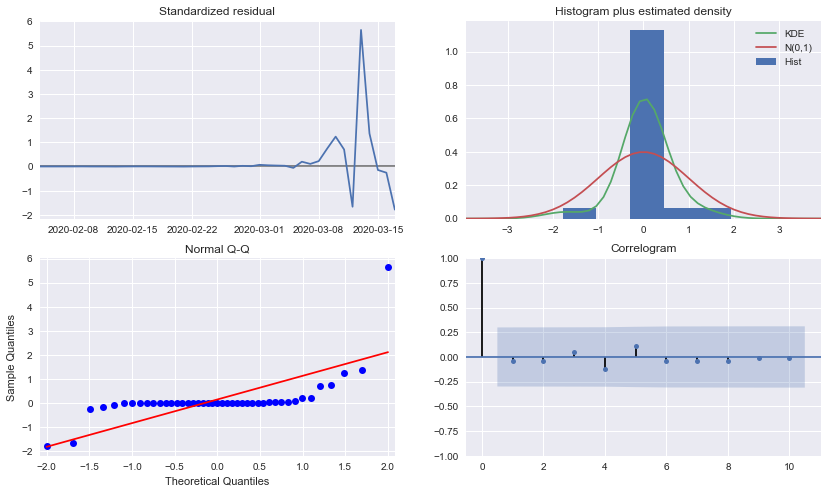

In [380]:
model.plot_diagnostics(figsize = (14, 8))
plt.show()